
# Business Cases with Data Science 

## Case 3: Prediction of Bookings Cancellation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Pedro Santos (M20190420)
2. Ana Claudia Alferes (M20190932)
3. Lennart Dangers (M20190251)
4. Michael Machatschek (M20190054)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

This jupypter-notebook provides the code in python to do a customer segmentation of a given dataset. A more detailed description of this project and the solutions can be found in the report. 

# Step 1: Business Understanding

Please consult our report for further details. 

# Step 2: Data Understanding

## Dataset Description

A data dictionary is available in the appendix of our report.
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
import plotly.offline as po 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


In [86]:
df = pd.read_csv("data.csv")

In [42]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [43]:
df.columns.values

array(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType',
       'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate'], dtype=object)

In [87]:
non_numerical_var = ["Agent", "ArrivalDateMonth",
                    "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth","ArrivalDateYear","AssignedRoomType",
                     "Company", "Country", "CustomerType","DepositType",
                     "DistributionChannel", "IsCanceled", "IsRepeatedGuest", "MarketSegment",
                     "Meal", "ReservationStatus",
                     "ReservationStatusDate", "ReservedRoomType"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [46]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [47]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Agent--------------------
          9    31955
       NULL     8131
          1     7137
         14     3640
          7     3539
               ...  
        464        1
        270        1
        453        1
        213        1
        242        1
Name: Agent, Length: 224, dtype: int64


--------------------ArrivalDateMonth--------------------
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: ArrivalDateMonth, dtype: int64


--------------------ArrivalDateWeekNumber--------------------
33    2383
42    2032
20    2016
30    2011
32    1991
17    1965
25    1959
34    1950
21    1948
18    1914
38    1887
23    1869
28    1865
27    1854
41    1842
39    1833
24    1823
15    1783
29    1726
40    1722
22    1697
26    1670
16    1650
35    1642
19    1640
31    1640
13    1605
37    1596


In [48]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two

Error in callback <function flush_figures at 0x000002BA36661B88> (for post_execute):


KeyboardInterrupt: 

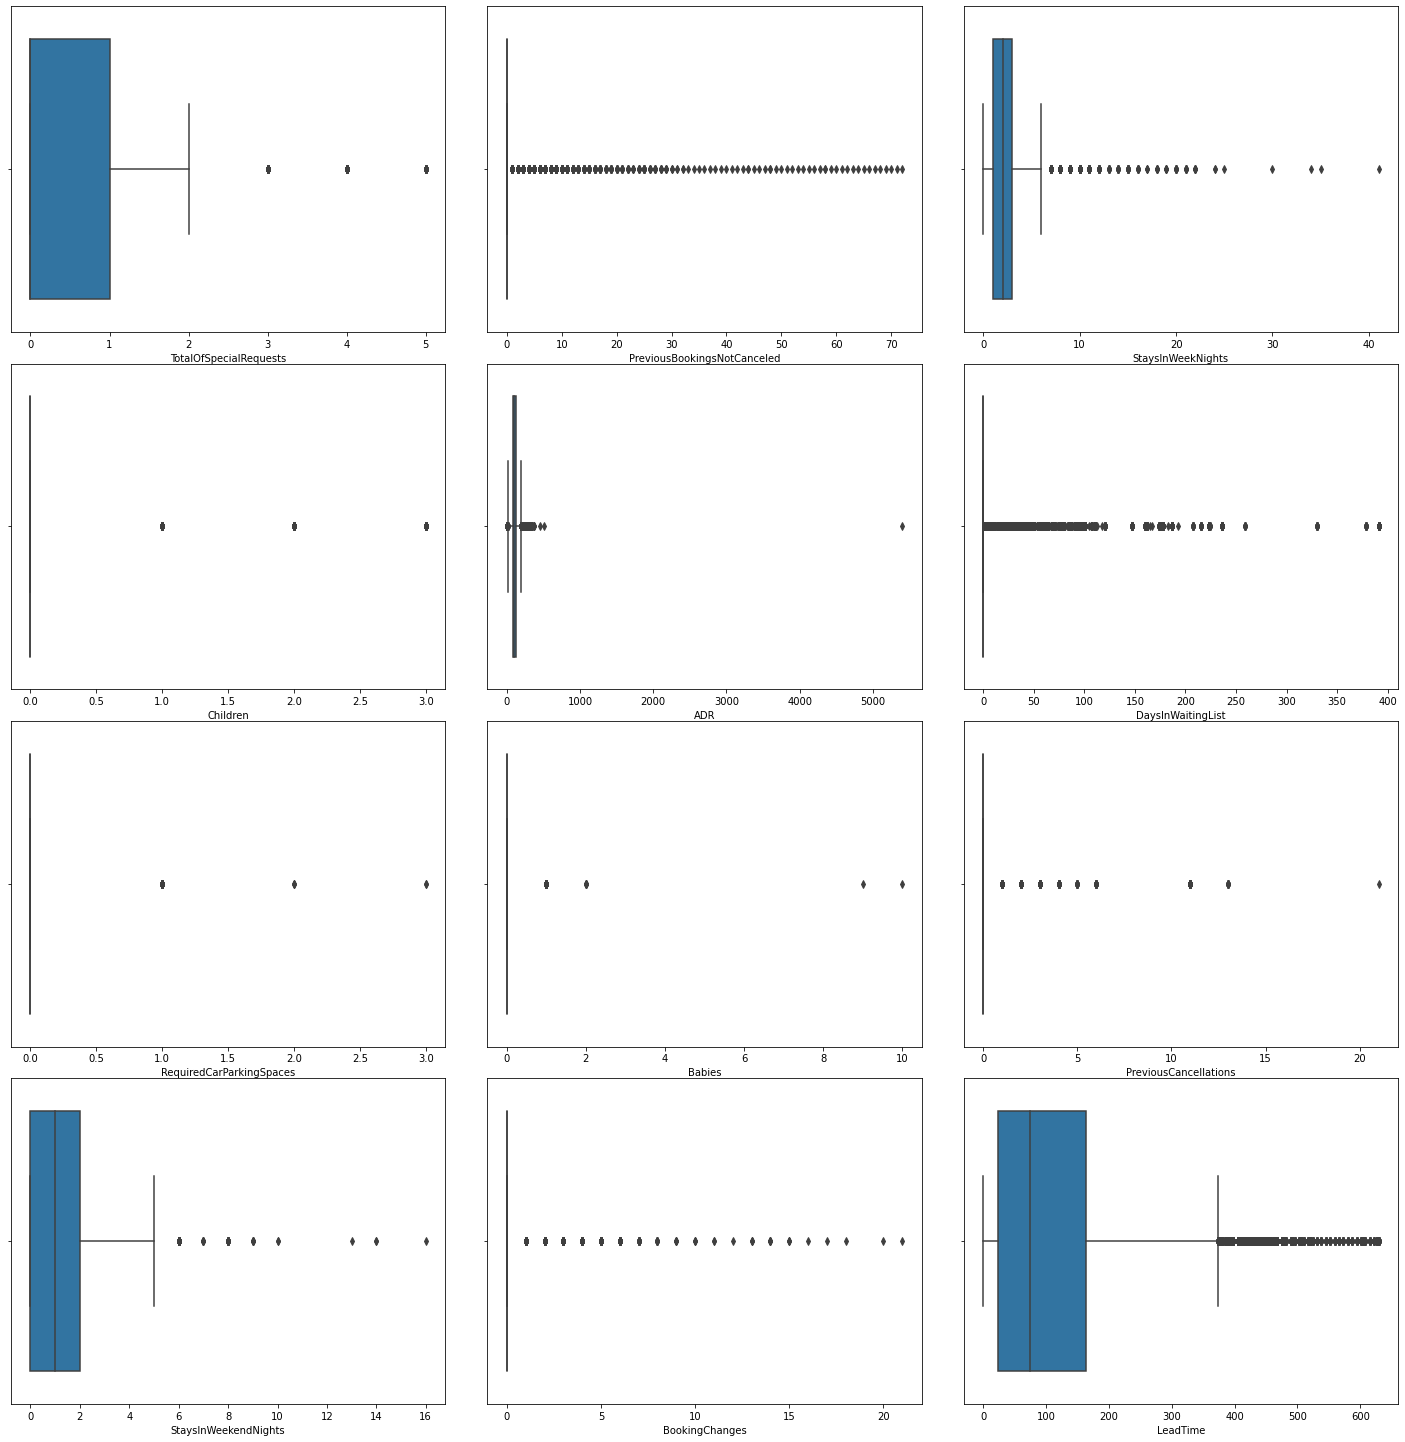

In [49]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

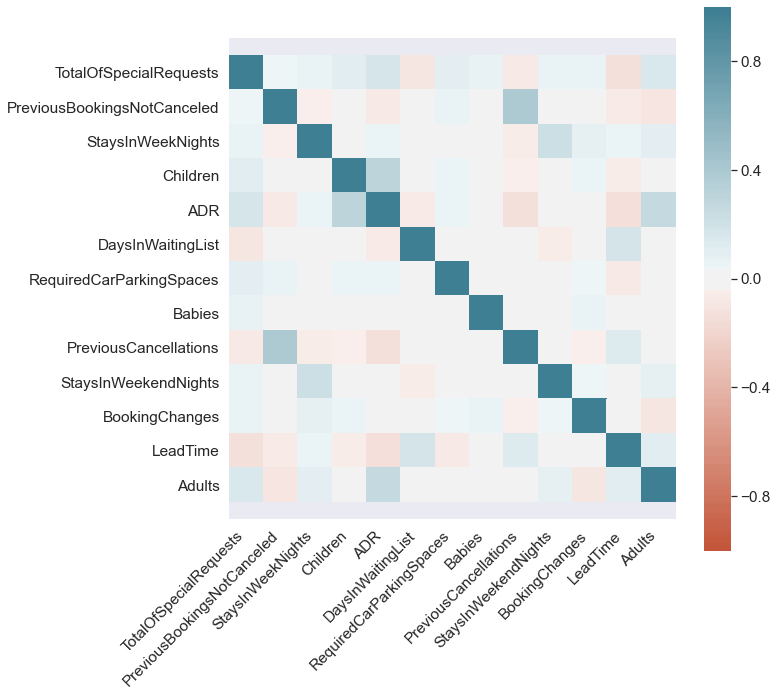

In [50]:
corr = df[numerical_var].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
can = df[df.IsCanceled == 1].IsCanceled.count()
Ncan = df[df.IsCanceled == 0].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=300, width=400, title_text="Canceled vs. Not Canceled")
fig.show()

KeyboardInterrupt: 

In [ ]:
can = df[df.IsCanceled == 1][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateYear", right_on="ArrivalDateYear" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Year", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateMonth", right_on="ArrivalDateMonth" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Month", plot_bgcolor="white")
fig.show() 

In [ ]:
can = df[df.IsCanceled == 1][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Agent", right_on="Agent" ).head() 
print(pf_group)

x=[1,2,3,4,5]

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
can = df[df.IsCanceled == 1][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ReservedRoomType", right_on="ReservedRoomType" ).head() 

x=pf_group.ReservedRoomType.values

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
R = df[df.ReservedRoomType == df.AssignedRoomType].IsCanceled.count()
W = df[df.ReservedRoomType != df.AssignedRoomType].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Right Assigned Room','Wrong Assigned Room'], values=[R, W]))
fig.update_layout(height=500, width=500, title_text="Assigned Room Type")
fig.show()

In [ ]:
df['FamilySize'] = df['Adults'] + df['Children'] + df['Babies']
df_F = df[df.FamilySize != 0]

can = df_F[df_F.IsCanceled == 1][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df_F[df_F.IsCanceled == 0][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "FamilySize", right_on="FamilySize" ) 
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Family Size", plot_bgcolor="white")
fig.show() 

In [ ]:
can = df[(df.IsCanceled == 1) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsCanceled == 0) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Booking with at least 1 Booking Change")
fig.show()

In [ ]:
can = df[df.IsCanceled == 1][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Country", right_on="Country" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Country", plot_bgcolor="white")
fig.show() 

#Remember this one it's problematic since we just know the real country from the customer when the customer arrives

In [ ]:
can = df[df.IsCanceled == 1][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "CustomerType", right_on="CustomerType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Customer Type", plot_bgcolor="white")
fig.show() 

In [ ]:
can = df[df.IsCanceled == 1][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DepositType", right_on="DepositType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Deposit Type", plot_bgcolor="white")
fig.show() 

In [ ]:
can = df[df.IsCanceled == 1][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DistributionChannel", right_on="DistributionChannel" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Distribution Channel", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "MarketSegment", right_on="MarketSegment" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [ ]:
can = df[(df.IsRepeatedGuest == 1)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsRepeatedGuest == 0)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Repeat Customer','First Time Customer'], values=[can, Ncan]))
fig.update_layout(height=300, width=600, title_text="Check for repeat customers")
fig.show()

In [ ]:
fig = go.Figure(data=[ 
    go.Histogram(x=df[df.IsCanceled == 1].LeadTime,nbinsx=50, name="Canceled"),
    go.Histogram(x=df[df.IsCanceled == 0].LeadTime,nbinsx=50, name="Not Canceled")])

fig.update_layout(title_text="Lead time in Canceled and Not Canceled Bookings")
fig.show() 

In [ ]:
can = df[df.IsCanceled == 1][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "Meal", right_on="Meal" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [ ]:
can = df[df.IsCanceled == 1].PreviousCancellations.sum()
Ncan = df[df.IsCanceled == 0].PreviousCancellations.sum()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Previous Cancellations")
fig.show()

In [ ]:
can = df[df.IsCanceled == 1] 
Ncan = df[df.IsCanceled == 0] 

fig = make_subplots(2,2, subplot_titles=["Canceled Weekend","Canceled Week"
                                        , "Not Canceled Weekend", "Not Canceled Week"])

fig.add_trace(go.Histogram(x=can.StaysInWeekendNights, name="Restaurant Day"),1,1)
fig.add_trace(go.Histogram(x=can.StaysInWeekNights, name="Delivery Day"),1,2)

fig.add_trace(go.Histogram(x=Ncan.StaysInWeekendNights, name="Restaurant Month"),2,1)
fig.add_trace(go.Histogram(x=Ncan.StaysInWeekNights, name="Delivery Month"),2,2)

fig.update_layout(title_text="Number of nights booked", plot_bgcolor="white", showlegend=False)

fig.show() 

In [ ]:
can = df[df.IsCanceled == 1][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "TotalOfSpecialRequests", right_on="TotalOfSpecialRequests" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Total of Special Requests", plot_bgcolor="white")
fig.show()

## Summary Data Understanding / Data Exploration


# Step 3: Data Preparation

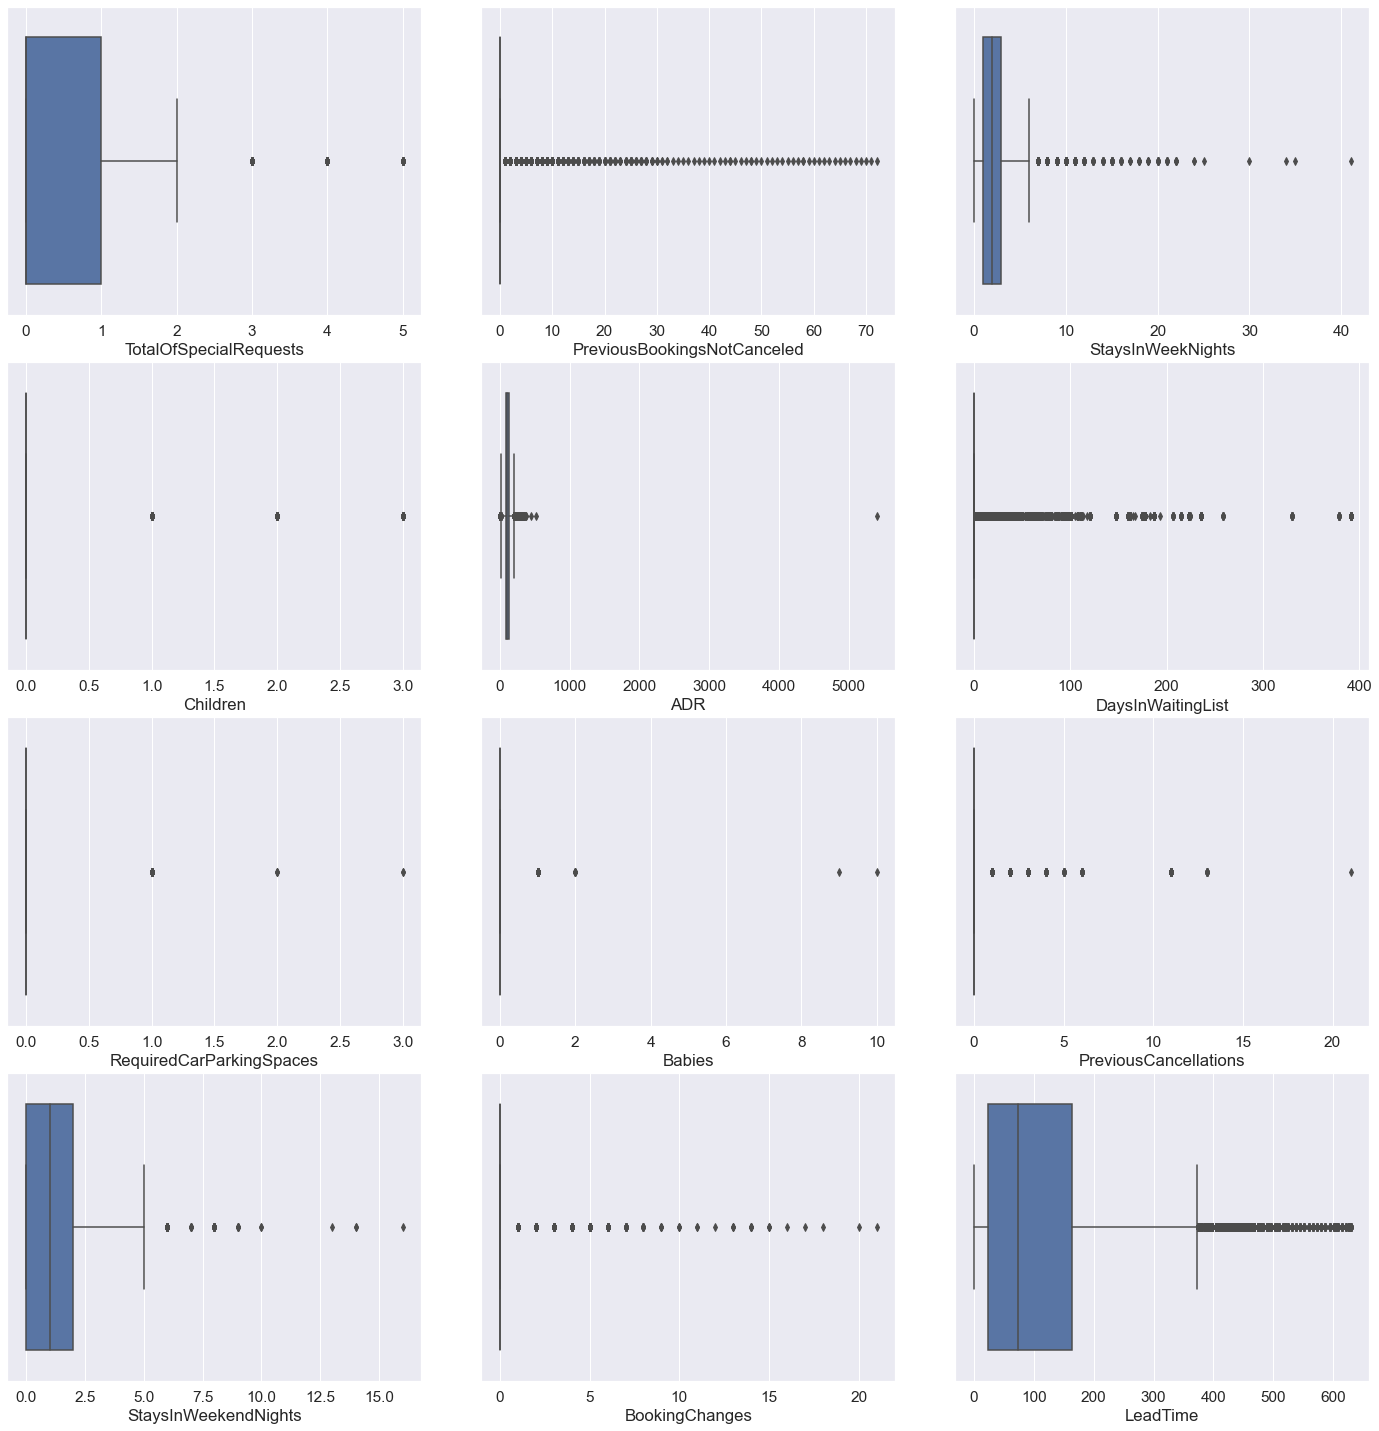

In [88]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

In [89]:
#drop ghost guests (~100rows)
noguests= df[df.Babies + df.Children + df.Adults == 0].index
df.drop(df.index[noguests], inplace=True)

In [90]:
#Drop customers that didnt stay any night (~260 rows)
nonights = df[df.StaysInWeekendNights + df.StaysInWeekNights == 0].index
df.drop(df.index[nonights], inplace=True)

In [91]:
df.corr()["IsCanceled"].sort_values(ascending = False )

IsCanceled                     1.000000
LeadTime                       0.308856
PreviousCancellations          0.166049
DaysInWaitingList              0.060709
StaysInWeekNights              0.051062
Adults                         0.049315
ArrivalDateWeekNumber          0.001631
ArrivalDateYear               -0.003263
ArrivalDateDayOfMonth         -0.004487
StaysInWeekendNights          -0.006638
ADR                           -0.014765
Children                      -0.027520
Babies                        -0.030249
PreviousBookingsNotCanceled   -0.053364
IsRepeatedGuest               -0.064097
RequiredCarParkingSpaces      -0.133533
BookingChanges                -0.150328
TotalOfSpecialRequests        -0.294582
Name: IsCanceled, dtype: float64

In [92]:
df.RequiredCarParkingSpaces.value_counts()
#Only 5 cases with more than 1 car. These records wont affect the final result, so they can be dropped
df = df[df.RequiredCarParkingSpaces<=1]

In [94]:
df#analysing Average Daily Rate
print("Max",df.ADR.max(), "\n", "Min", df.ADR.min(), "\n", "Mean", df.ADR.mean())
#second highest value
df.ADR.value_counts().sort_index(ascending=False)
#Second highest value is 510, lets drop values above
df = df[df.ADR < 520] #1 record
#check lower values
df.ADR.value_counts().sort_index()[:40]
#There are some values with really low ADR. This could mean Staff and other people related to the hotel.
#As such we will drop these "customers" as they dont bring value to our analysis.
print("number of customers who paid less than 20€ for hotel:",df.ADR.value_counts().sort_index()[:20].sum())
df = df[df.ADR > 20] #1284 record from which 1064 are paid 0

Max 510.0 
 Min 0.0 
 Mean 105.45013803505667
number of customers who paid less than 20€ for hotel: 1284


In [95]:
#Looking into FamilySize, most people travel in groups of 1-4, with few exceptions with 5. 
#There are 2 cases above 10. We will remove these outliers as they may have prejudicial results
#X.FamilySize.value_counts()
#X= X[X.FamilySize <10]

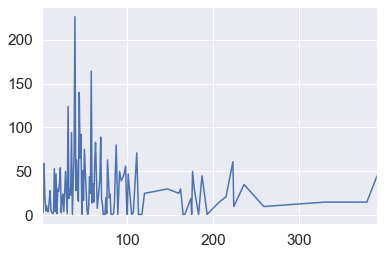

In [96]:
df.DaysInWaitingList[df.DaysInWaitingList>0].value_counts().sort_index().plot()
#Even if we remove 0, the most common ocurrence, people usually stay in waiting list for ~50 days, but it is not uncommon
#to see customers with longer waiting time.

0      2618
1      1723
2      1054
4       987
3       966
       ... 
380       1
387       1
366       1
389       1
347       1
Name: LeadTime, Length: 453, dtype: int64

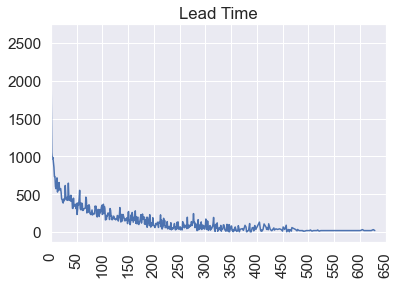

In [97]:
df.PreviousCancellations.value_counts()
#People usually dont have previous cancellations as most of them are new customers. Bin? 0,1+

df.TotalOfSpecialRequests.value_counts()
#No requests most common, then one request. Having more than 2 is also pretty common.Bin? 0,1,2+

df.BookingChanges.value_counts()
#No changes is most common. Having 1 or 2 changes also happen. Bin? 0, 1, 2+

df.LeadTime.value_counts().sort_index().plot(title="Lead Time", xticks = [0,50,100,150,200,250,300,350,400,450,500,550,600,650], rot=90)
df.LeadTime.value_counts()
#Several types of customers,depending on their booking time... No real outliers. Bin?


## Feature Preparation/Engineering

In [98]:
# Check the cancellation ratio:

def cancellation_ratio (feature):
    can = df[df.IsCanceled == 1][[feature,"IsCanceled"]].groupby([feature]).count()
    ncan = df[df.IsCanceled == 0][[feature,"IsCanceled"]].groupby([feature]).count()
    can_ratio = pd.merge(left=can,right=ncan,on=feature,suffixes=('=1', '=0'))
    can_ratio["cancelRatio"]=can_ratio["IsCanceled=1"]/(can_ratio["IsCanceled=0"]+can_ratio["IsCanceled=1"])
    can_ratio.sort_values(by='cancelRatio')
    return can_ratio

In [100]:
#ADR binned regarding the bins from booking.com
df["ADRBinned"] = df.ADR.apply(lambda x: '0-19' if x>=0 and x<20 else 
                                         ('20-50' if x>=20 and x<51 else
                                          ('51-100' if x>=51 and x<101 else
                                           ('101-150' if x>=101 and x<151 else
                                            ('151-200' if x>=151 and x<201 else '200+')))))

#StaysInWeekendNights and StaysInWeekNights binning into total nights
#2-3     42807
#4-7     21672
#1       13272
#8-30     1241
#30+       338

df["totalNights"]=df.StaysInWeekendNights + df.StaysInWeekNights

df["totalNightsBinned"] = df.totalNights.apply(lambda x: '1' if x==1 else 
                                         ('2-3' if x>=2 and x<4 else
                                          ('4-7' if x>=4 and x<8 else
                                           ('8-30' if x>=8 and x<31 else '30+'))))

#Agent binning by cancellation ration higher 50 percent
ratio=cancellation_ratio("Agent")
df = df.merge(ratio, left_on=["Agent"], right_on=["Agent"], how='left') 
df["AgentBinned"] = df.cancelRatio.apply(lambda x: 'Above50PercCanceled' if x>0.5 else 'Below50PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#MarketSegment binning by cancellation ratio 

#Aviation         0.219409
#Complementary    0.118081
#Corporate        0.214668
#Direct           0.173314
#Groups           0.688587
#Offline TA/TO    0.428316
#Online TA        0.373981

ratio=cancellation_ratio("MarketSegment")
df = df.merge(ratio, left_on=["MarketSegment"], right_on=["MarketSegment"], how='left') 
df["MarketSegmentBinned"] = df.cancelRatio.apply(lambda x: 'Above25PercCanceled' if x>0.25 else 'Below25PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#LeadTime binning
#31-120     28244
#121-365    25020
#8-30       12554
#0-7        10808
#366+        2704

df["LeadTimeBinned"] = df.LeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else 
                                         ('8-30' if x>=8 and x<31 else 
                                          ('31-120' if x>=31 and x<121 else
                                           ('121-365' if x>=121 and x<366 else '366+'))))

#ArrivalDateMonth binning
#divided into below and above average cancellation (41.7 %)

#1    42743
#0    36587

#Cancellation Ratio: 
#April        0.463235
#August       0.400980
#December     0.421104
#February     0.382880
#January      0.396681
#July         0.408754
#June         0.446922
#March        0.369464
#May          0.443756
#November     0.381226
#October      0.429717
#September    0.420270

ratio=cancellation_ratio("ArrivalDateMonth")
df = df.merge(ratio, left_on=["ArrivalDateMonth"], right_on=["ArrivalDateMonth"], how='left') 
df["ArrivalDateMonth>avgCancel"] = df.cancelRatio.apply(lambda x: '1' if x>0.417 else '0')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True) 


#binning by season (peak, winter and spring) 
#PeakSeason      32365
#WinterSeason    24795
#SpringSeason    22170
df["ArrivalDateMonthSeason"] = df.ArrivalDateMonth.apply(lambda x: 'PeakSeason' if x in ["June","July","August","September"] else
                                                         ('WinterSeason'if x in ["October","November","December","January","February"] else 
                                                         'SpringSeason'))

#BookingChanges binning (dummy)
#0    69062
#1    10268
df["BookingChangesBinned"] = df.BookingChanges.apply(lambda x: '1' if x>=1 else '0')

#RequiredCarParkingSpaces binning (dummy)
#0    77404
#1     1926
df["RequiredCarParkingSpacesBinned"] = df.RequiredCarParkingSpaces.apply(lambda x: '1' if x>=1 else '0')

#TotalOfSpecialRequests binning (dummy)
#0    47957
#1    31373
df["TotalOfSpecialRequestsBinned"] = df.TotalOfSpecialRequests.apply(lambda x: '1' if x>=1 else '0')

#Company binned
#0    75641
#1     3689
df["CompanyBinned"] = df.Company.apply(lambda x: '1' if x!="       NULL" else '0')

#Children binning (into hasChildren)
#0    74224
#1     5106
df["hasChildren"] = df.Children.apply(lambda x: '1' if x>=1 else '0')

#CustomerType binning (transient+contract and rest)
#1    61704
#0    17626
df["transientAndContract"] = df.CustomerType.apply(lambda x: '1' if x=="Transient" or x=="Contract" else '0')

#DaysInWaitingList
#0        75887
#31-90     2042
#90+        843
#1-30       558
df["DaysInWaitingListBinned"] = df.DaysInWaitingList.apply(lambda x: '0' if x==0 else 
                                         ('1-30' if x>=1 and x<31 else 
                                           ('31-90' if x>=31 and x<91 else '90+')))

In [112]:
le = preprocessing.LabelEncoder()
df['ADR_encoded'] = le.fit_transform(df['ADRBinned'])

#define encoder
status_ohe = OneHotEncoder()

#apply encoder
ARD = status_ohe.fit_transform(df.ADR_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_ARD = pd.DataFrame(ARD, 
                                       columns= ["ADR" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_ARD], axis=1)

#Ordinal Encoder to make sure the order it's correct
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit_transform(df[['ADRBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['ADRBinned'], categories=['0-19','20-50','51-100','101-150','151-200','200+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['ADR_encoded'] = labels


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [102]:
df['nights_encoded'] = le.fit_transform(df['totalNightsBinned'])

#apply encoder
Nights = status_ohe.fit_transform(df.nights_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_Ni = pd.DataFrame(Nights, 
                                       columns= ["Nights" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_Ni], axis=1)

ordinalencoder.fit_transform(df[['totalNightsBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['totalNightsBinned'], categories=['1','2-3', '4-7', '8-30','30+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['nights_encoded'] = labels


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [103]:
df['leadtime_encoded'] = le.fit_transform(df['LeadTimeBinned'])

#apply encoder
Lead = status_ohe.fit_transform(df.leadtime_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_LT = pd.DataFrame(Lead, 
                                       columns= ["LeadTime" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_LT], axis=1)

ordinalencoder.fit_transform(df[['LeadTimeBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['LeadTimeBinned'], categories=['0-7', '8-30', '31-120', '121-365', '366+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['leadtime_encoded'] = labels

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [104]:
df['agent_encoded'] = le.fit_transform(df['AgentBinned'])

#apply encoder
Agent = status_ohe.fit_transform(df.agent_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_A = pd.DataFrame(Agent, 
                                       columns= ["Agent" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_A], axis=1)

df = df.drop(columns =['agent_encoded'])

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [105]:
df['market_encoded'] = le.fit_transform(df['MarketSegmentBinned'])

#apply encoder
Market = status_ohe.fit_transform(df.market_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_M = pd.DataFrame(Agent, 
                                       columns= ["Market" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_M], axis=1)

df = df.drop(columns =['market_encoded'])

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [106]:
df['season_encoded'] = le.fit_transform(df['ArrivalDateMonthSeason'])

#apply encoder
Season = status_ohe.fit_transform(df.season_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_S = pd.DataFrame(Season, 
                                       columns= ["Season" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_S], axis=1)

df = df.drop(columns =['season_encoded'])

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [107]:
df['daysWaiting_encoded'] = le.fit_transform(df['DaysInWaitingListBinned'])

#apply encoder
Waiting = status_ohe.fit_transform(df.daysWaiting_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_DW = pd.DataFrame(Waiting, 
                                       columns= ["DaysWaiting" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_DW], axis=1)

ordinalencoder.fit_transform(df[['DaysInWaitingListBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['DaysInWaitingListBinned'], categories=['0', '1-30', '31-90', '90+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['daysWaiting_encoded'] = labels

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [117]:
# Change dtype of some columns to int 
df.BookingChangesBinned = df.BookingChangesBinned.astype(int)
df.RequiredCarParkingSpacesBinned = df.RequiredCarParkingSpacesBinned.astype(int)
df.TotalOfSpecialRequestsBinned = df.TotalOfSpecialRequestsBinned.astype(int)
df.CompanyBinned = df.CompanyBinned.astype(int)
df.hasChildren = df.hasChildren.astype(int)
df.transientAndContract = df.transientAndContract.astype(int)

In [113]:
initial_features_bin = ['PreviousCancellations', 
       'BookingChangesBinned', 'RequiredCarParkingSpacesBinned',
       'TotalOfSpecialRequestsBinned', 'CompanyBinned', 'hasChildren',
       'transientAndContract', 'daysWaiting_encoded',
       'ADR101-150', 'ADR151-200', 'ADR20-50', 'ADR200+', 'ADR51-100',
       'Nights1', 'Nights2-3', 'Nights30+', 'Nights4-7', 'Nights8-30',
       'LeadTime0-7', 'LeadTime121-365', 'LeadTime31-120', 'LeadTime366+',
       'LeadTime8-30',
       'AgentAbove50PercCanceled', 'AgentBelow50PercCanceled',
       'MarketAbove25PercCanceled', 'MarketBelow25PercCanceled',
       'SeasonPeakSeason', 'SeasonSpringSeason', 'SeasonWinterSeason']

# Step 4: Modeling

In [118]:
# Prepare X and y
y = df['IsCanceled']
X = df[initial_features_bin]


# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [120]:
# Functions for model selection

def run_log_regression(penalty, max_iter):
    logistic_regression= LogisticRegression(penalty=penalty,max_iter= max_iter,verbose=10,random_state=1)
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)

    print('---------------------- Logistic Regression ----------------------')
    print('- Parameter: penalty= ' + penalty + " , max_iter= " + str(max_iter))
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ',metrics.recall_score(y_test, y_pred))
    print('F1: ',metrics.f1_score(y_test, y_pred))
    

def run_random_forest(n_estimators, criterion, min_samples_split):
    clf=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, min_samples_split= min_samples_split,verbose=2,random_state=1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    print('---------------------- Random Forest ----------------------')
    print('- Parameter: n_estimators= ' + str(n_estimators) + " , criterion= " + str(criterion)+ " , min_samples_split= " + str(min_samples_split))
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ',metrics.recall_score(y_test, y_pred))
    print('F1: ',metrics.f1_score(y_test, y_pred))#
    

def run_gradient_boosting(n_estimators, learning_rate, max_leaf_nodes):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,max_leaf_nodes=max_leaf_nodes,verbose=2,random_state=1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    print('---------------------- Gradient Boosting ----------------------')
    print('- Parameter: n_estimators= ' + str(n_estimators) + ", learning_rate= " + str(learning_rate)+ ", max_leaf_nodes= " + str(max_leaf_nodes))    
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ',metrics.recall_score(y_test, y_pred))
    print('F1: ',metrics.f1_score(y_test, y_pred))
    
    
def run_mlp(hidden_layer_sizes, activation, max_iter, alpha):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,activation=activation,max_iter=max_iter, alpha=alpha,solver='adam', #for smaller datasets 'lbfgs' may be better
                        verbose=True,random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('---------------------- Multi Layer Perceptron ----------------------')
    print('- Parameter: hidden_layer_sizes= ' + str(hidden_layer_sizes) 
          + ", activation= " + str(activation)+ ", max_iter= " + str(max_iter) + ", alpha= " + str(alpha))    
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ',metrics.recall_score(y_test, y_pred))
    print('F1: ',metrics.f1_score(y_test, y_pred))
    

def run_xgboost(max_depth, n_estimators, learning_rate, reg_lamba):
    clf = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, reg_lambda=reg_lamba,verbosity=1, random_state=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print('---------------------- XGBoost ----------------------')
    print('- Parameter: max_depth= ' + str(max_depth) 
          + ", n_estimators= " + str(n_estimators)+ ", learning_rate= " + str(learning_rate) + ", reg_lambda= " + str(reg_lambda)) 
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ',metrics.recall_score(y_test, y_pred))
    print('F1: ',metrics.f1_score(y_test, y_pred))

In [121]:
# Logistic Regression
penalties = ["l1", "l2", "none"]
max_iters = [100,150,200]

params_combinations = list(itertools.product(penalties, max_iters))

for p,mi in params_combinations: 
    run_log_regression(p,mi)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



[LibLinear]---------------------- Logistic Regression ----------------------
- Parameter: penalty= l1 , max_iter= 100
Accuracy:  0.7700355615111065
Precision:  0.7460869565217392
Recall:  0.6850509765385088
F1:  0.7142674180327869
[LibLinear]

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



KeyboardInterrupt: 

In [ ]:
# Random Forest
n_trees = [50, 100, 200, 400]
criterion = ["gini", "entropy"]
mss = [2, 5, 10, 15]

params_combinations = list(itertools.product(n_trees, criterion, mss))

for n,c,m in params_combinations: 
    run_random_forest(n,c,m)

In [ ]:
# Gradient Boosting 
n_trees = [20, 50, 100, 200, 300]
lrs = [0.05, 0.1, 0.2, 0.3]
mln = [8, 16, 24, 32]

params_combinations = list(itertools.product(n_trees, lrs, mln))

for n,l,m in params_combinations: 
    run_gradient_boosting(n,l,m)

In [ ]:
# Neural Network - Multi Layer Perceptron
afs = ["logistic", "relu", "tanh"]
alphas = [0.0001, 0.0002,0.0005, 0.001]
max_iters = [150, 200, 300, 500]
number_nodes = round((2/3)*len(X_train.columns.values)) + 2
hls = [(number_nodes,number_nodes),(number_nodes,number_nodes,number_nodes),(number_nodes,number_nodes-1,number_nodes-2)]

params_combinations = list(itertools.product(afs, alphas, max_iters, hls))

for af,a,mi,nn,h in params_combinations: 
    run_mlp(h,af,mi,a)

In [ ]:
# XGBoost
max_depths = [3,5,10]
n_trees = [20, 50, 100, 200]
lrs = [0.05, 0.1, 0.3, 0.5]
lambdas = [0,1,2]

params_combinations = list(itertools.product(max_depths, n_trees, lrs, lambdas))

for md,nt,lr,l in params_combinations: 
    run_xgboost(md,nt,lr,l)

# Step 5: Evaluation
